In [10]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "sisi"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from Utils.data_utils import load_train_test_data
from matplotlib import pyplot as plt
from pandas import Timestamp
import pickle
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [12]:
(train_list, test_list), state_list = load_train_test_data(pwd)

In [13]:
test_list[0]

,carbon_per_MWh
Date,
2021-12-31 01:00:00+00:00,412.899235
2021-12-31 02:00:00+00:00,394.983381
2021-12-31 03:00:00+00:00,373.891838
2021-12-31 04:00:00+00:00,343.876998
2021-12-31 05:00:00+00:00,325.939101
...,...
2022-05-12 01:00:00+00:00,284.150513
2022-05-12 02:00:00+00:00,291.982263
2022-05-12 03:00:00+00:00,288.439333


In [14]:
#Creating lag value for each state '''probably not needed'''
for i in range(len(train_list)):
    train_list[i]['lag1'] = train_list[i]['carbon_per_MWh'].shift(24)
    train_list[i] = train_list[i].dropna()
    
for i in range(len(test_list)):
    test_list[i]['lag1'] = test_list[i]['carbon_per_MWh'].shift(24)
    test_list[i] = test_list[i].dropna()

In [15]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [16]:
train_list[0]

,carbon_per_MWh,lag1
Date,,
2018-07-04 05:00:00+00:00,425.727761,428.530509
2018-07-04 06:00:00+00:00,406.542612,430.069745
2018-07-04 07:00:00+00:00,397.211138,486.440186
2018-07-04 08:00:00+00:00,384.970887,512.173077
2018-07-04 09:00:00+00:00,383.051737,510.579051
...,...,...
2021-12-30 20:00:00+00:00,387.267303,308.580147
2021-12-30 21:00:00+00:00,371.341878,320.544101
2021-12-30 22:00:00+00:00,360.994811,322.059430


In [17]:
test_list[0]

,carbon_per_MWh,lag1
Date,,
2022-01-01 01:00:00+00:00,320.516007,412.899235
2022-01-01 02:00:00+00:00,317.448522,394.983381
2022-01-01 03:00:00+00:00,357.694642,373.891838
2022-01-01 04:00:00+00:00,376.555328,343.876998
2022-01-01 05:00:00+00:00,385.025764,325.939101
...,...,...
2022-05-12 01:00:00+00:00,284.150513,287.571776
2022-05-12 02:00:00+00:00,291.982263,296.865662
2022-05-12 03:00:00+00:00,288.439333,302.000181


In [18]:
predictions = []
errors = []
for train, test in zip(train_list, test_list):
    train_features = np.array(train['lag1'])
    train_labels = np.array(train['carbon_per_MWh'])
    test_features = np.array(test['lag1'])
    test_labels = np.array(test['carbon_per_MWh'])
    rf.fit(train_features.reshape(-1,1), train_labels)
    prediction = rf.predict(test_features.reshape(-1,1))
    predictions.append(prediction)
    errors.append(abs(prediction - test_labels))

In [35]:
np.merrors[0]

array([ 31.06745839,  80.06520115,  15.84456231, ...,  56.2076879 ,
        23.21984076, 127.53479149])

In [29]:
for state, error in zip(state_list, errors):
    print(f"MAE for {state} = {error}")

MAE for Texas = [ 31.06745839  80.06520115  15.84456231 ...  56.2076879   23.21984076
 127.53479149]
MAE for Carolinas = [22.34109163  9.02923292  4.48994148 ... 16.92738581 11.47895168
 21.9195243 ]
MAE for Florida = [ 0.01464198  4.25951042  1.80958189 ... 14.23690176  7.16011497
  8.60290422]
MAE for Southeast = [ 3.80701766  7.05029725 14.86918553 ...  5.01880745 46.77623849
 13.3278583 ]
MAE for Tennessee = [26.87709494 60.14631001 63.43923785 ... 11.97725697 25.23880188
 35.46213135]
MAE for Central = [116.2494885  255.43922259  16.40161338 ...  36.00395407  52.88412843
  78.65263084]
MAE for Southwest = [15.66596358 17.10434911 47.72413358 ...  5.27972762 19.90986531
 18.47795345]
MAE for Midwest = [40.89913931 79.09248739 85.71706005 ... 33.86234904 47.71091182
 27.79224343]
MAE for New-York = [32.71277683  2.59998037  8.55803333 ... 11.49573572 22.37234346
  1.67321018]
MAE for Mid-Atlantic = [31.26783147 32.62471656 32.14222723 ... 14.03038882  6.3812585
 20.67337509]
MAE for

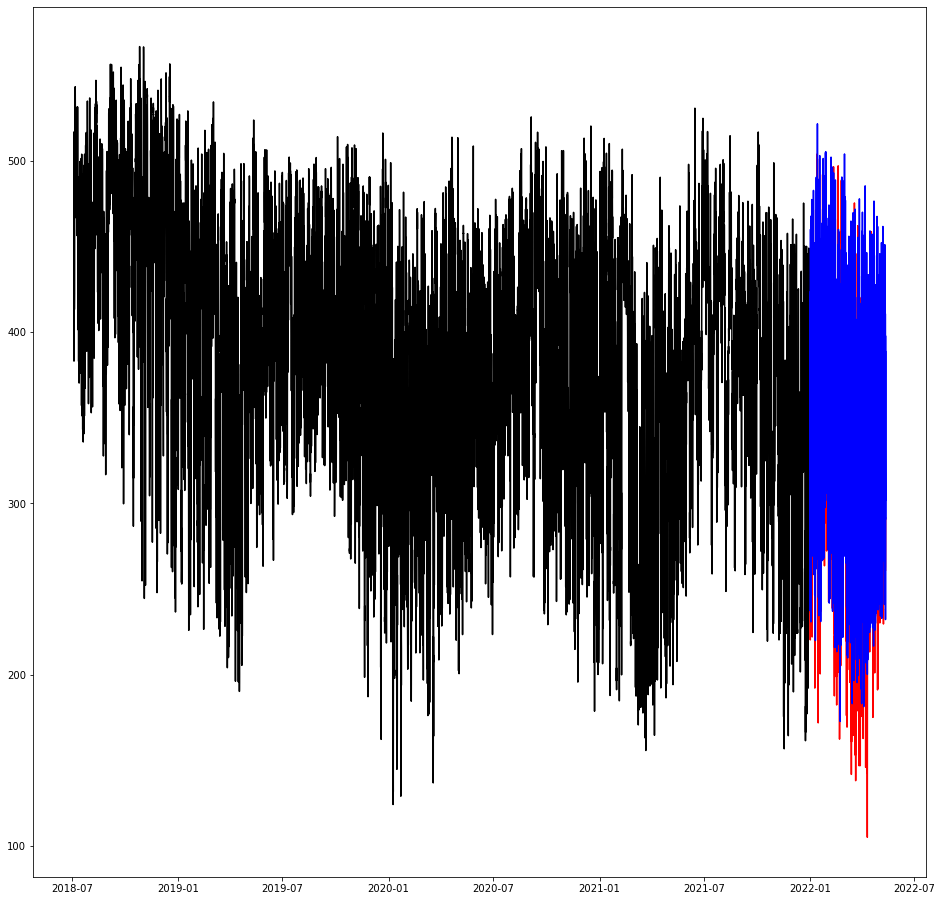

In [19]:
plt.figure(figsize=(16,16))
plt.plot(train_list[0].index, train_list[0]['carbon_per_MWh'], color='black')
plt.plot(test_list[0].index, test_list[0]['carbon_per_MWh'], color='red')
plt.plot(test_list[0].index, predictions[0], color='blue')

In [20]:
hour_dict_list = []
for i in range(len(test_list)):
    hour_dict = {test_list[i].index[j] : predictions[i][j] for j in range(len(predictions[i]))}
    hour_dict_list.append(hour_dict)

In [21]:
predictions[0]

array([351.58346549, 397.51372329, 341.85007979, ..., 232.23164512,
       299.1960508 , 388.56107679])

In [22]:
file = open(f'{pwd}/data/predictions/rfpred.pkl', 'wb')
pickle.dump(hour_dict_list, file)
file.close()
file2 = open(f'{pwd}/data/predictions/state_list.pkl', 'wb')
pickle.dump(state_list, file2)
file2.close()

In [24]:
temp = pickle.load(open(f'{pwd}/data/predictions/rfpred.pkl', 'rb'))

In [28]:
temp[2]

{Timestamp('2022-01-01 01:00:00+0000', tz='UTC'): 345.58811013486036,
 Timestamp('2022-01-01 02:00:00+0000', tz='UTC'): 344.6375290430433,
 Timestamp('2022-01-01 03:00:00+0000', tz='UTC'): 336.6718477336599,
 Timestamp('2022-01-01 04:00:00+0000', tz='UTC'): 356.9294292553968,
 Timestamp('2022-01-01 05:00:00+0000', tz='UTC'): 334.5280738570779,
 Timestamp('2022-01-01 06:00:00+0000', tz='UTC'): 335.79851876748717,
 Timestamp('2022-01-01 07:00:00+0000', tz='UTC'): 327.57624116097685,
 Timestamp('2022-01-01 08:00:00+0000', tz='UTC'): 325.519690561814,
 Timestamp('2022-01-01 09:00:00+0000', tz='UTC'): 329.68033088564755,
 Timestamp('2022-01-01 10:00:00+0000', tz='UTC'): 309.59954231169485,
 Timestamp('2022-01-01 11:00:00+0000', tz='UTC'): 335.08309091448416,
 Timestamp('2022-01-01 12:00:00+0000', tz='UTC'): 328.6291577506795,
 Timestamp('2022-01-01 13:00:00+0000', tz='UTC'): 333.71216238171,
 Timestamp('2022-01-01 14:00:00+0000', tz='UTC'): 331.2578011544566,
 Timestamp('2022-01-01 15:00:00